<H1>Let's Grow More Data Science Intern Dec 2023<H1>
<H1>Stock Market Prediction and Forecasting Using Stacked LSTM<H1>
<H1>Ankita Saha<H1>

In [1]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plot
import numpy as np
import seaborn as sns

In [3]:
#reading data set
df = pd.read_csv("Stock_Market_Prediction.csv")
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
#summary of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Last'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Total Trade Quantity'}>],
       [<Axes: title={'center': 'Turnover (Lacs)'}>, <Axes: >, <Axes: >]],
      dtype=object)

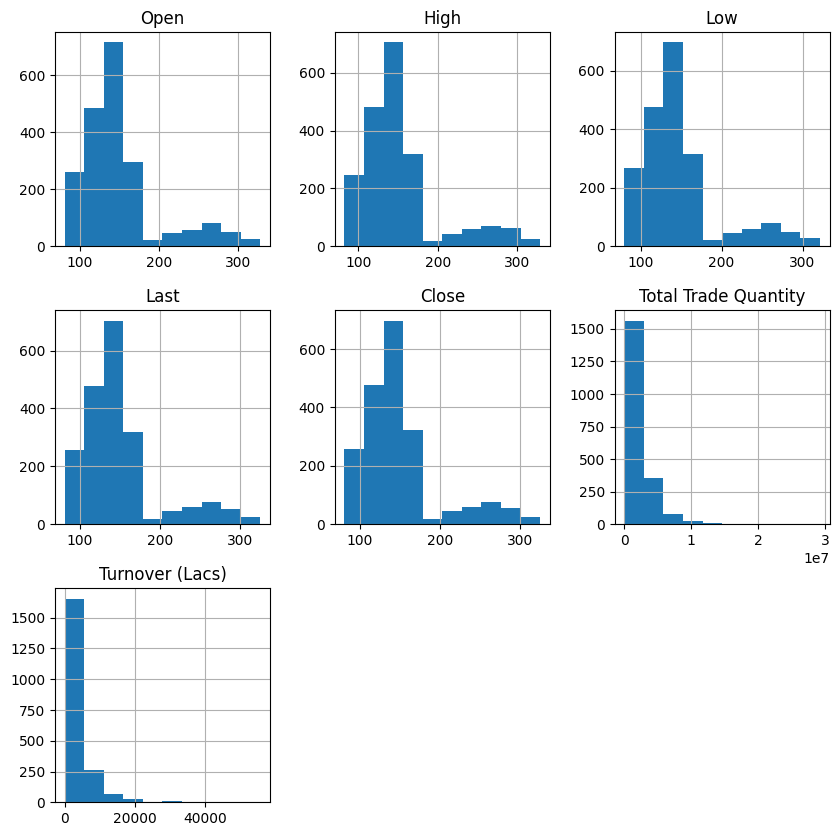

In [5]:
#histogram for each numeric column in dataframe
df.hist(figsize=(10, 10))

In [6]:
#checking for null values
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [7]:
#converting the values of Date column of the dataframe to numeric format
df['Date'] = pd.to_numeric(df['Date'], errors='coerce')

In [8]:
#finding correlation of the columns
df.corr()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,NaN,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,NaN,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,NaN,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,NaN,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,NaN,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,NaN,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),NaN,0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


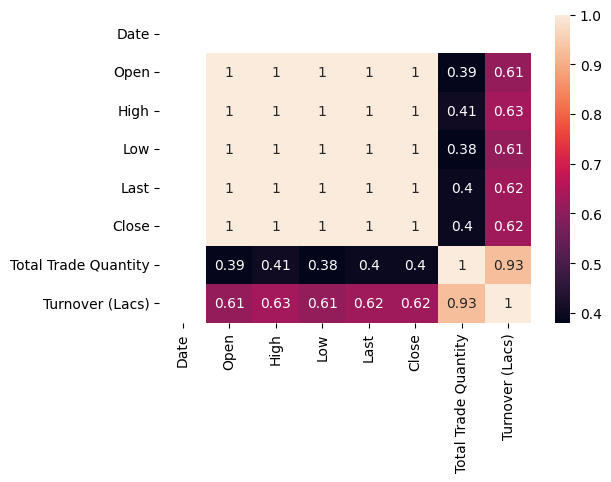

In [9]:
#heatmap of the correlation matrix
fig, ax = plot.subplots(figsize=(6, 4))
sns.heatmap(df.corr(),annot=True)
plot.show()

In [10]:
#picking up the close column
df1=df.reset_index()['Close']
df1.shape
print(df1)

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64


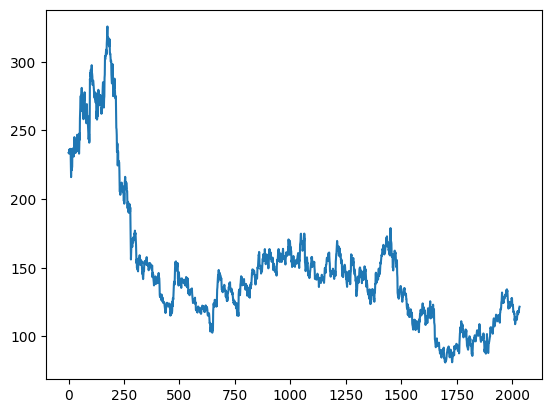

In [11]:
#plotting close column
plot.plot(df1)

In [12]:
#performing Min Max scaling on the values in the dataframe
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
df1=sc.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
#Splitting data as 65% training and 35% testing
train_size = int(len(df1)*0.65)
test_size = len(df1) - train_size
train, test = df1[0:train_size,:], df1[train_size:len(df1), :1] #Train_data and Test_data

In [14]:
def create_ds(dataset, step = 1):
  datax, datay = [],[]
  for i in range(len(dataset)-step-1):
    arr = dataset[i:(i + step), 0] #2d graph because of the step = 1
    datax.append(arr)
    datay.append(dataset[i + step, 0])
  return np.array(datax), np.array(datay)

In [16]:
x_train, y_train = create_ds(train, 100)
x_test, y_test = create_ds(train, 100)

In [17]:
# re-shape input to be [samples, time steps, features] which is required for LSTM
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
#sequential LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (100, 1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
#Recurrence, validation means test
model.fit(x_train, y_train , validation_data = (x_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
20/20 [==============================] - 8s 166ms/step - loss: 0.0196 - val_loss: 0.0040
Epoch 2/100
20/20 [==============================] - 2s 120ms/step - loss: 0.0033 - val_loss: 0.0016
Epoch 3/100
20/20 [==============================] - 2s 126ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 4/100
20/20 [==============================] - 3s 151ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 5/100
20/20 [==============================] - 3s 147ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 6/100
20/20 [==============================] - 2s 122ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 7/100
20/20 [==============================] - 2s 121ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 8/100
20/20 [==============================] - 3s 145ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 9/100
20/20 [==============================] - 3s 135ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/100
20/20 [==============================] - 2s 122ms/step - loss: 0.0012 - val_lo

In [22]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

39/39 [==============================] - 1s 23ms/step


In [23]:
import tensorflow as tf

In [24]:
train_predict=sc.inverse_transform(train_predict).sum(axis = 1)
test_predict= sc.inverse_transform(test_predict).sum(axis = 1)
#This is the reverse scalar

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

168.25171798447766

In [26]:
math.sqrt(mean_squared_error(y_test,test_predict))

168.25171798447766

In [27]:
#shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,0] = train_predict

In [28]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan

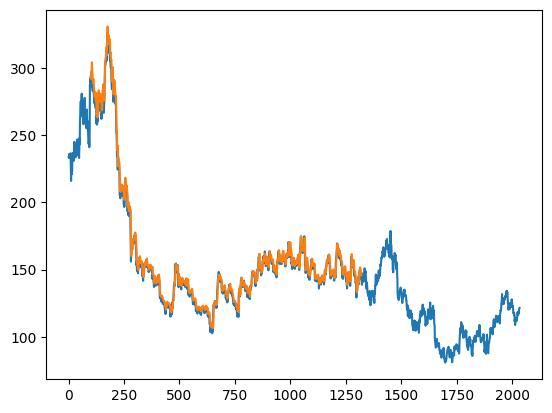

In [29]:
# plot baseline and predictions
plot.plot(sc.inverse_transform(df1))
plot.plot(trainPredictPlot)
plot.plot(testPredictPlot)
plot.show()

In [30]:
#taking a portion of the test data starting from index 341 and reshaping it into a 2D array with one row
x_input=test[341:].reshape(1,-1)
x_input.shape

(1, 372)

In [31]:
temp=list(x_input)
temp=temp[0].tolist()
temp

[0.048815359477124176,
 0.048815359477124176,
 0.05310457516339867,
 0.049632352941176405,
 0.05065359477124176,
 0.05126633986928103,
 0.049632352941176405,
 0.05902777777777779,
 0.055555555555555525,
 0.040849673202614345,
 0.037377450980392135,
 0.037377450980392135,
 0.026552287581699308,
 0.02879901960784309,
 0.03165849673202614,
 0.03165849673202614,
 0.036356209150326724,
 0.022058823529411742,
 0.016748366013071836,
 0.014501633986928053,
 0.022263071895424813,
 0.03615196078431371,
 0.02675653594771238,
 0.03206699346405223,
 0.02696078431372545,
 0.035743464052287566,
 0.03594771241830064,
 0.0404411764705882,
 0.039215686274509776,
 0.044117647058823484,
 0.029820261437908446,
 0.012254901960784326,
 0.012867647058823484,
 0.011437908496731986,
 0.0024509803921567985,
 0.005923202614379064,
 0.0,
 0.007148692810457491,
 0.0042892156862744946,
 0.006740196078431349,
 0.006331699346405206,
 0.011233660130718914,
 0.019607843137254888,
 0.02757352941176472,
 0.030024509803921

In [ ]:
#generate predictions for a time series data set
lst_output=[]
temp_input=[]
n_steps=372
i=0
while(i<30):

    if(len(temp_input)>372):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

In [32]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

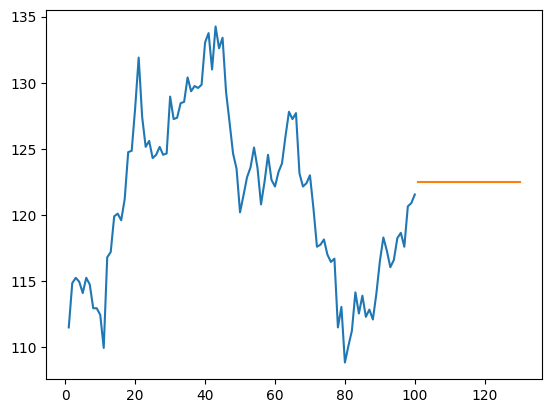

In [39]:
plot.plot(day_new,sc.inverse_transform(df1[1935:]))
plot.plot(day_pred,sc.inverse_transform(lst_output))

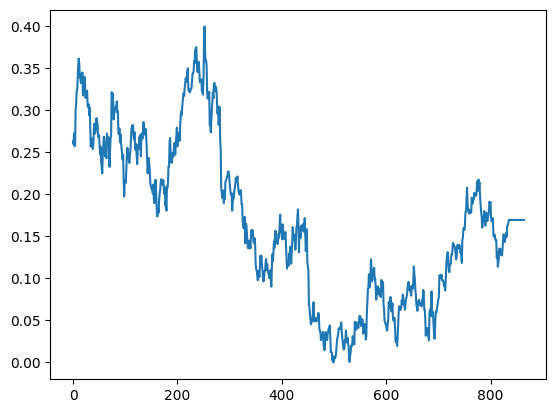

In [40]:
df3=df1.tolist()
df3.extend(lst_output)
plot.plot(df3[1200:])